In [ ]:
import tensorflow.keras as keras
import numpy as np
import sklearn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import TensorBoard

In [ ]:
# Load dataset
data = np.load('ORL_faces.npz')

# Load the Train Images
x_train = data['trainX']
# normalize every image
x_train = np.array(x_train, dtype='float32') / 255

x_test = data['testX']
x_test = np.array(x_test, dtype='float32') / 255

# Load the label of images
y_train = data['trainY']
y_test = data['testY']

# show the train and test data format
print('x_train : {}'.format(x_train.shape))
print('y_train shape: {}'.format(y_train.shape))
print('x_test shape: {}'.format(x_test.shape))

x_train : (240, 10304)
y_train shape: (240,)
x_test shape: (160, 10304)


In [ ]:
x_train, x_valid, y_train, y_valid = train_test_split(
    x_train, y_train, test_size=0.5, random_state=1234)

In [ ]:
im_rows = 112
im_cols = 92
batch_size = 512
im_shape = (im_rows, im_cols, 1)

# change the size of images
x_train = x_train.reshape(x_train.shape[0], *im_shape)
x_test = x_test.reshape(x_test.shape[0], *im_shape)
x_valid = x_valid.reshape(x_valid.shape[0], *im_shape)

print('x_train shape: {}'.format(x_train.shape))
print('x_test shape: {}'.format(x_test.shape))

x_train shape: (120, 112, 92, 1)
x_test shape: (160, 112, 92, 1)


In [ ]:
cnn_model = Sequential([
    Conv2D(filters=36, kernel_size=7, activation='relu', input_shape=im_shape),
    MaxPooling2D(pool_size=2),
    Conv2D(filters=54, kernel_size=5, activation='relu'),
    MaxPooling2D(pool_size=2),
    Flatten(),
    Dense(2024, activation='relu'),
    Dropout(0.5),
    Dense(1024, activation='relu'),
    Dropout(0.5),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(20, activation='softmax')
])

cnn_model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=Adam(lr=0.0001),
    metrics=['accuracy']
)

In [ ]:
cnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 106, 86, 36)       1800      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 53, 43, 36)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 49, 39, 54)        48654     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 24, 19, 54)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 24624)             0         
                                                                 
 dense_4 (Dense)             (None, 2024)             

In [ ]:
history = cnn_model.fit(
    x_train, y_train, batch_size=batch_size,
    epochs=250, verbose=2,
    validation_data=(x_valid, y_valid)
)

Epoch 1/250
1/1 - 5s - loss: 3.0120 - accuracy: 0.0250 - val_loss: 3.1310 - val_accuracy: 0.0333 - 5s/epoch - 5s/step
Epoch 2/250
1/1 - 3s - loss: 3.3204 - accuracy: 0.0417 - val_loss: 3.0110 - val_accuracy: 0.0333 - 3s/epoch - 3s/step
Epoch 3/250
1/1 - 3s - loss: 3.1085 - accuracy: 0.0500 - val_loss: 2.9940 - val_accuracy: 0.0667 - 3s/epoch - 3s/step
Epoch 4/250
1/1 - 4s - loss: 2.9755 - accuracy: 0.0667 - val_loss: 2.9941 - val_accuracy: 0.0333 - 4s/epoch - 4s/step
Epoch 5/250
1/1 - 3s - loss: 2.9763 - accuracy: 0.1000 - val_loss: 2.9997 - val_accuracy: 0.1000 - 3s/epoch - 3s/step
Epoch 6/250
1/1 - 3s - loss: 2.9672 - accuracy: 0.1000 - val_loss: 3.0248 - val_accuracy: 0.0333 - 3s/epoch - 3s/step
Epoch 7/250
1/1 - 4s - loss: 2.9969 - accuracy: 0.0833 - val_loss: 3.0233 - val_accuracy: 0.0333 - 4s/epoch - 4s/step
Epoch 8/250
1/1 - 3s - loss: 3.0188 - accuracy: 0.0583 - val_loss: 3.0057 - val_accuracy: 0.0417 - 3s/epoch - 3s/step
Epoch 9/250
1/1 - 3s - loss: 2.9896 - accuracy: 0.0417 -

In [ ]:
scor = cnn_model.evaluate(np.array(x_test), np.array(y_test), verbose=0)

print('test los {:.4f}'.format(scor[0]))
print('test acc {:.4f}'.format(scor[1]))

test los 0.4642
test acc 0.9062


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


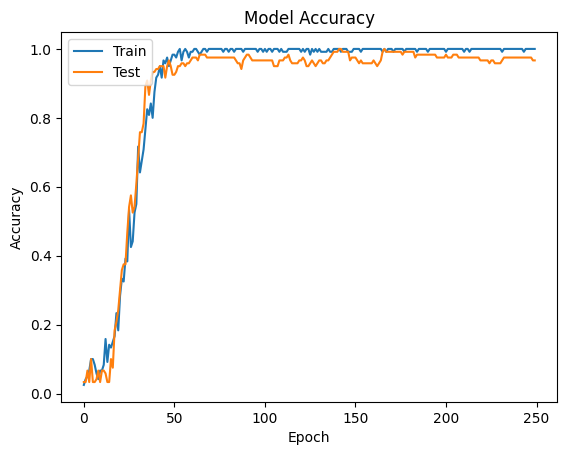

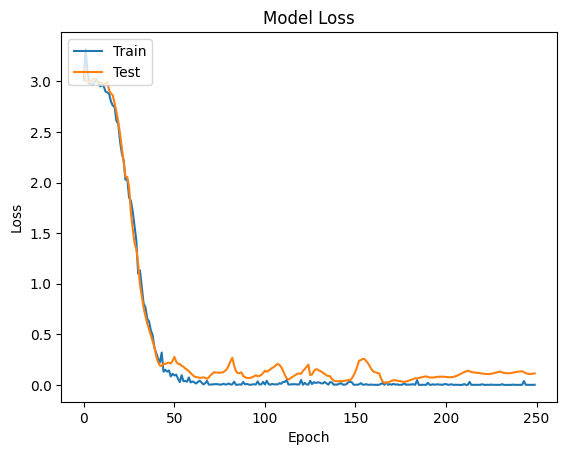

In [ ]:
# list all data in history
print(history.history.keys())

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

5/5 [==============================] - 1s 200ms/step
Accuracy: 
0.90625
Confusion matrix, without normalization
[[8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 4 0 0 0 1 1 0 0 0 0 0 0 0 2 0 0]
 [0 0 0 0 0 8 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 8 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 8 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 8 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 2 0 6 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 8 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 8 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 8 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 7 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 8 0 0 0 0 0]
 [1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 3 0 0 2 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 7 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 8 0 0]
 [0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 6 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 8]]
Confusion matrix, without n

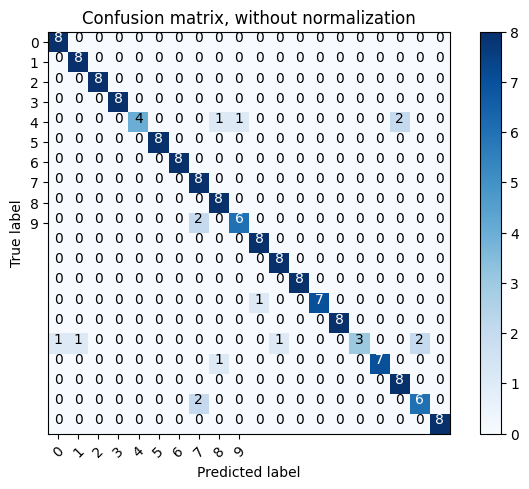

Confusion matrix, without normalization


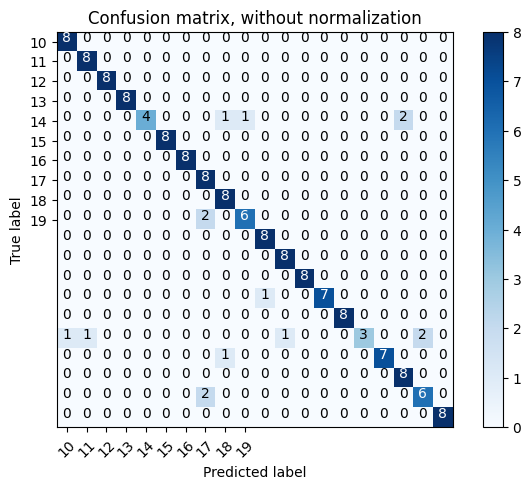

Confusion matrix:
[[8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 4 0 0 0 1 1 0 0 0 0 0 0 0 2 0 0]
 [0 0 0 0 0 8 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 8 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 8 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 8 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 2 0 6 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 8 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 8 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 8 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 7 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 8 0 0 0 0 0]
 [1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 3 0 0 2 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 7 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 8 0 0]
 [0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 6 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 8]]
              precision    recall  f1-score   support

           0       0.89      1.00      0.94         8
           1

In [ ]:
import itertools
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix

predicted = np.array(cnn_model.predict(x_test))
# print(predicted)
# print(y_test)
ynew = np.argmax(cnn_model.predict(x_test), axis=1)

Acc = accuracy_score(y_test, ynew)
print("Accuracy: ")
print(Acc)

cnf_matrix = confusion_matrix(y_test, ynew)

# y_test1 = np_utils.to_categorical(y_test, 20)


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix,
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    #print(cm)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
        
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

print('Confusion matrix, without normalization')
print(cnf_matrix)

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=[0,1,2,3,4,5,6,7,8,9],
                      title='Confusion matrix, without normalization')
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=[10,11,12,13,14,15,16,17,18,19],
                      title='Confusion matrix, without normalization')

print("Confusion matrix:\n%s" % confusion_matrix(y_test, ynew))
print(classification_report(y_test, ynew))
